In [2]:
import pandas as pd
import numpy as np
import itertools as it
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import random

from collections import Counter
import operator

In [3]:
prot_mass_df = pd.read_csv('human_proteome_mass_bins2.csv')

In [4]:
##### Arosne2: check to see if I have imported the correct file. 
prot_mass_df.head()

,Unnamed: 0,Entry,Entry Name,Protein names,Gene Names,Mass,0-15,15-29,29-33,33-37,37-39,39-41,41-53,53-80
0,0,A0A024QZ08,A0A024QZ08_HUMAN,Intraflagellar transport 20 homolog (Chlamydom...,IFT20 hCG_31823,15281,0,0,0,0,0,0,0,0
1,1,A0A024QZ86,A0A024QZ86_HUMAN,"T-box 2, isoform CRA_a",TBX2 hCG_32216,75066,0,0,0,0,0,0,0,0
2,2,A0A024QZA8,A0A024QZA8_HUMAN,Receptor protein-tyrosine kinase (EC 2.7.10.1),EPHA2 hCG_24712,108266,0,0,0,0,0,0,0,0
3,3,A0A024QZB8,A0A024QZB8_HUMAN,Battenin,CLN3 hCG_1745226,47623,0,0,0,0,0,0,0,0
4,4,A0A024QZQ1,A0A024QZQ1_HUMAN,Sirtuin (Silent mating type information regula...,SIRT1 hCG_32306,81681,0,0,0,0,0,0,0,0


In [32]:
#arosne2: prot_id is the Uniprot Entry, This changes the dataframe in place
def Tprof_append_df(prot_id, Stoichiometry):
    #arosne2: tprof= prot_mass_df("Entry")
    m = prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"Mass"]
    ms= Stoichiometry * m
    if ms > 1005000:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"0-15"] = 1
    elif 1005000 > ms > 670000:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"15-29"] = 1
    elif 670000 > ms > 435000:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"29-33"] = 1
    elif 435000 > ms > 150000:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"33-37"] = 1
    elif 150000 > ms > 102000:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"37-39"] = 1
    elif 102000 > ms > 40000:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"41-53"] = 1
    elif 40000 > ms > 0:
        prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"53-80"] = 1
    return 

In [50]:
Tprof_df("A0A024QZB8", 1)

In [5]:
#arosne2: make dataframe with all proteins of interest and thier stoichiometry.
prot_of_interest_stoic_df = pd.DataFrame([["A0A024QZ86",4],['A0A024QZA8',5]],columns=['prot_id','Stoichiometry'])


In [6]:
#arosne2: output dataframe into csv
prot_of_interest_stoic_df.to_csv('prot_of_interest_stoic.csv')

In [7]:
#arosne2: if dataframe already exists, take in dataframe with all proteins of interest and thier stoichiometry.
prot_of_interest_stoic_df = pd.read_csv('prot_of_interest_stoic.csv')

In [8]:

prot_of_interest_stoic_df.head()

,Unnamed: 0,prot_id,Stoichiometry
0,0,A0A024QZ86,4
1,1,A0A024QZA8,5


In [45]:
#arosne2: pull the prot_id and the Stoichiometry from the input dataframe into a dictionary
dict_prot_stoic= dict(zip(prot_of_interest_stoic_df.prot_id,prot_of_interest_stoic_df.Stoichiometry))

In [46]:
#arosne2: Check the dictionary
print(dict_prot_stoic)

{'A0A024QZ86': 4, 'A0A024QZA8': 5}


In [22]:
#arosne2: 1. create a new df, then append that df with every consecutive prot/stoic

In [47]:
Output_df = pd.DataFrame()
for k in dict_prot_stoic:
    Temp_df=Tprof_df_0thru80(k, dict_prot_stoic[k])
    print(Temp_df)
    if Output_df.empty:
        Output_df= Temp_df
    else:
        Output_df= pd.concat([Output_df, Temp_df])
Output_df= Output_df.set_index('prot_id')
print(Output_df)

      prot_id  Stoichiometry  0  1  2  3  4  5  6  7  ...  71  72  73  74  75  \
0  A0A024QZ86              4  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   

   76  77  78  79  80  
0   0   0   0   0   0  

[1 rows x 83 columns]
      prot_id  Stoichiometry  0  1  2  3  4  5  6  7  ...  71  72  73  74  75  \
0  A0A024QZA8              5  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   

   76  77  78  79  80  
0   0   0   0   0   0  

[1 rows x 83 columns]
            Stoichiometry  0  1  2  3  4  5  6  7  8  ...  71  72  73  74  75  \
prot_id                                               ...                       
A0A024QZ86              4  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   
A0A024QZA8              5  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   

            76  77  78  79  80  
prot_id                         
A0A024QZ86   0   0   0   0   0  
A0A024QZA8   0   0   0   0   0  

[2 rows x 82 columns]


In [136]:
#arosner: prot_id is the Uniprot Entry, This creates a new list.
def Tprof_df2(input_dict):
    for key, value in input_dict:
        key = prot_id
        value = Stoichiometry

        
#arosne2: take mass from Uni_prot csv using prot_id, multiply mass by stoichiometry.
    m = prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"Mass"]
    ms= Stoichiometry * m
 #arosne2: number of fraction bins
    binsnum = 10
    r=[0]*binsnum
    r[0]= prot_id
    r[1]= Stoichiometry
   
 #arosne2: check the Mass*Stoichiometry against each of the bins of fractions. binary: 1 if in that bin, 0 if not.   
    if ms > 1005000:
        r[2]=1
    elif 1005000 > ms > 670000:
        r[3]=1
    elif 670000 > ms > 435000:
        r[4]=1
    elif 435000 > ms > 150000:
        r[5]=1
    elif 150000 > ms > 102000:
        r[6]=1
    elif 102000 > ms > 40000:
        r[7]=1
    elif 40000 > ms > 10000:
        r[8]=1
    elif 10000 > ms > 0:
        r[9]=1
         
            #arosne2: export list to df in columns with bins
    r_df = pd.DataFrame({'prot_id':[r[0]],
                        'Stoichiometry':[r[1]],
                         '0-15':[r[2]],
                         '15-29':[r[3]],
                         '29-33':[r[4]],
                         '33-37':[r[5]],
                         '37-39':[r[6]],
                         '39-41':[r[7]],
                         '41-53':[r[8]],
                         '53-80':[r[9]] })

    return r_df

In [139]:
Tprof_df2(**dict_prot_stoic)

TypeError: Tprof_df2() got an unexpected keyword argument 'A0A024QZ86'

In [144]:
#arosner: prot_id is the Uniprot Entry, This creates a new list.
def Tprof_df(prot_id, Stoichiometry):
#arosne2: take mass from Uni_prot csv using prot_id, multiply mass by stoichiometry.
    m = prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"Mass"]
    ms= Stoichiometry * m
 #arosne2: number of fraction bins
    binsnum = 10
    r=[0]*binsnum
    r[0]= prot_id
    r[1]= Stoichiometry
   
 #arosne2: check the Mass*Stoichiometry against each of the bins of fractions. binary: 1 if in that bin, 0 if not.   
    if ms > 1005000:
        r[2]=1
    elif 1005000 > ms > 670000:
        r[3]=1
    elif 670000 > ms > 435000:
        r[4]=1
    elif 435000 > ms > 150000:
        r[5]=1
    elif 150000 > ms > 102000:
        r[6]=1
    elif 102000 > ms > 40000:
        r[7]=1
    elif 40000 > ms > 10000:
        r[8]=1
    elif 10000 > ms > 0:
        r[9]=1
         
            #arosne2: export list to df in columns with bins
    r_df = pd.DataFrame({'prot_id':[r[0]],
                        'Stoichiometry':[r[1]],
                         '0-15':[r[2]],
                         '15-29':[r[3]],
                         '29-33':[r[4]],
                         '33-37':[r[5]],
                         '37-39':[r[6]],
                         '39-41':[r[7]],
                         '41-53':[r[8]],
                         '53-80':[r[9]] })

    return r_df

In [48]:
#arosne2: prot_id is the Uniprot Entry, This creates a new list.
#arosne2: This creates a dataframe wih 0 through 80 fractions to output.
def Tprof_df_0thru80(prot_id, Stoichiometry):
#arosne2: take mass from Uni_prot csv using prot_id, multiply mass by stoichiometry.
    m = prot_mass_df.loc[prot_mass_df[prot_mass_df['Entry'] == prot_id].index[0],"Mass"]
    ms= Stoichiometry * m
 #arosne2: number of fraction bins
    binsnum = 10
    r=[0]*binsnum
    r[0]= prot_id
    r[1]= Stoichiometry
   
 #arosne2: check the Mass*Stoichiometry against each of the bins of fractions. binary: 1 if in that bin, 0 if not.   
    if ms > 1005000:
        r[2]=1
    elif 1005000 > ms > 670000:
        r[3]=1
    elif 670000 > ms > 435000:
        r[4]=1
    elif 435000 > ms > 150000:
        r[5]=1
    elif 150000 > ms > 102000:
        r[6]=1
    elif 102000 > ms > 40000:
        r[7]=1
    elif 40000 > ms > 10000:
        r[8]=1
    elif 10000 > ms > 0:
        r[9]=1
         
            #arosne2: export list to df in columns with bins
    r_df = pd.DataFrame({'prot_id':[r[0]],
                        'Stoichiometry':[r[1]],
                         '0':[r[2]],
                         '1':[r[2]],
                         '2':[r[2]],
                         '3':[r[2]],
                         '4':[r[2]],
                         '5':[r[2]],
                         '6':[r[2]],
                         '7':[r[2]],
                         '8':[r[2]],
                         '9':[r[2]],
                         '10':[r[2]],
                         '11':[r[2]],
                         '12':[r[2]],
                         '13':[r[2]],
                         '14':[r[2]],
                         '15':[r[2]],
                         '16':[r[3]],
                         '17':[r[3]],
                         '18':[r[3]],
                         '19':[r[3]],
                         '20':[r[3]],
                         '21':[r[3]], 
                         '22':[r[3]],
                         '23':[r[3]],
                         '24':[r[3]],
                         '25':[r[3]],
                         '26':[r[3]],
                         '27':[r[3]],
                         '28':[r[3]],
                         '29':[r[3]],
                         '30':[r[4]],
                         '31':[r[4]],
                         '32':[r[4]],
                         '33':[r[4]], 
                         '34':[r[5]],
                         '35':[r[5]],
                         '36':[r[5]],
                         '37':[r[5]],
                         '38':[r[6]],
                         '39':[r[6]],
                         '40':[r[7]],
                         '41':[r[8]],
                         '42':[r[8]],
                         '43':[r[8]],
                         '44':[r[8]], 
                         '45':[r[8]],
                         '46':[r[8]],
                         '47':[r[8]],
                         '48':[r[8]],
                         '49':[r[8]],
                         '50':[r[8]],
                         '51':[r[8]],
                         '52':[r[8]],
                         '53':[r[9]],
                         '54':[r[9]],
                         '55':[r[9]],
                         '56':[r[9]], 
                         '57':[r[9]],
                         '58':[r[9]],
                         '59':[r[9]],
                         '60':[r[9]],
                         '61':[r[9]], 
                         '62':[r[9]],
                         '63':[r[9]],
                         '64':[r[9]],
                         '65':[r[9]],
                         '66':[r[9]],
                         '67':[r[9]],
                         '68':[r[9]],
                         '69':[r[9]],
                         '70':[r[9]],
                         '71':[r[9]],
                         '72':[r[9]],
                         '73':[r[9]], 
                         '74':[r[9]],
                         '75':[r[9]],
                         '76':[r[9]],
                         '77':[r[9]],
                         '78':[r[9]],
                         '79':[r[9]],
                         '80':[r[9]]})

    return r_df

In [49]:
Tprof_df_0thru80(dict_prot_stoic)

TypeError: Tprof_df_0thru80() missing 1 required positional argument: 'Stoichiometry'

In [43]:
prot_of_interest_stoic_df.prot_id.values.tolist()

['A0A024QZ86', 'A0A024QZA8']

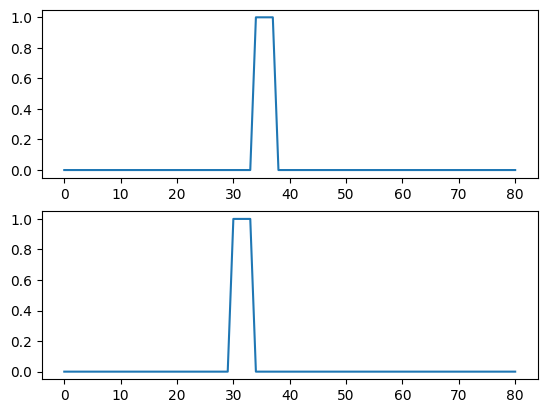

In [44]:
#arosne2: Plotting sparklines
#arosne2: Transform to compare to experimental Sparklines
IDs = prot_of_interest_stoic_df.prot_id.values.tolist()
fig, axs = plt.subplots(len(IDs))
for i,ID in enumerate(IDs):
    axs[i].plot(range(0,81), Output_df.loc[ID].values[1:], label='Predicted_Binned_Elution')

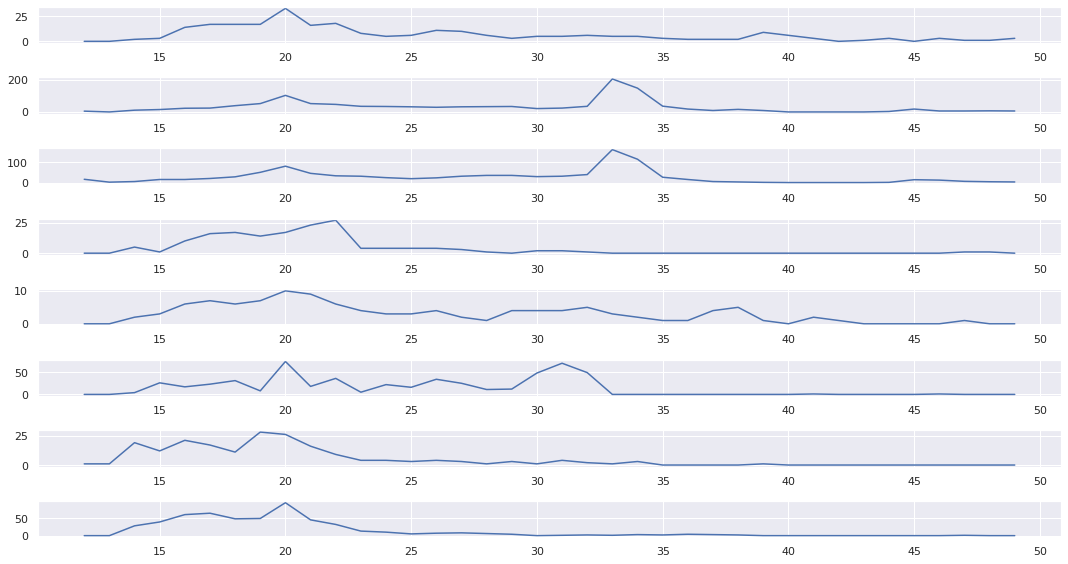

In [58]:
fig, axs = plt.subplots(len(EIF2_IDs))
for i,ID in enumerate(EIF2_IDs):
    axs[i].plot(range(12,50), EDTA_minus_df.loc[ID].values, label='EIF_2_Complex')